In [7]:
#import pertinent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

# Import the data

In [8]:
data = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/machine_learning_data/data.csv')
test_data = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/machine_learning_data/test_data.csv')

In [9]:
data.shape, test_data.shape

((1044, 318), (261, 318))

In [15]:
test_data[:5]

,medication,total_dose_0,total_dose_1,total_dose_2,total_dose_3,total_dose_4,total_dose_5,total_dose_6,total_dose_7,total_dose_8,total_dose_9,total_dose_10,total_dose_11,total_dose_12,total_dose_13,total_dose_14,total_dose_15,total_dose_16,total_dose_17,total_dose_18,total_dose_19,total_dose_20,total_dose_21,total_dose_22,total_dose_23,total_dose_24,sru_alcohol_0,sru_cannabis_0,sru_cocaine_0,sru_amphetamine_0,sru_methamphetamine_0,sru_opiates_0,sru_benzodiazepines_0,sru_methadone_0,sru_oxycodone_0,sru_other_0,sru_alcohol_4,sru_cannabis_4,sru_cocaine_4,sru_amphetamine_4,sru_methamphetamine_4,sru_opiates_4,sru_benzodiazepines_4,sru_methadone_4,sru_oxycodone_4,sru_other_4,sru_alcohol_8,sru_cannabis_8,sru_cocaine_8,sru_amphetamine_8,sru_methamphetamine_8,sru_opiates_8,sru_benzodiazepines_8,sru_methadone_8,sru_oxycodone_8,sru_other_8,sru_alcohol_12,sru_cannabis_12,sru_cocaine_12,sru_amphetamine_12,sru_methamphetamine_12,sru_opiates_12,sru_benzodiazepines_12,sru_methadone_12,sru_oxycodone_12,sru_other_12,sru_alcohol_16,sru_cannabis_16,sru_cocaine_16,sru_amphetamine_16,sru_methamphetamine_16,sru_opiates_16,sru_benzodiazepines_16,sru_methadone_16,sru_oxycodone_16,sru_other_16,sru_alcohol_20,sru_cannabis_20,sru_cocaine_20,sru_amphetamine_20,sru_methamphetamine_20,sru_opiates_20,sru_benzodiazepines_20,sru_methadone_20,sru_oxycodone_20,sru_other_20,sru_alcohol_24,sru_cannabis_24,sru_cocaine_24,sru_amphetamine_24,sru_methamphetamine_24,sru_opiates_24,sru_benzodiazepines_24,sru_methadone_24,sru_oxycodone_24,sru_other_24,t_Amphetamines_0,t_Benzodiazapines_0,t_Methadone_0,t_Oxycodone_0,t_Cocaine_0,t_Methamphetamine_0,t_Opiate300_0,t_Cannabinoids_0,t_Propoxyphene_0,t_Amphetamines_1,t_Benzodiazapines_1,t_Methadone_1,t_Oxycodone_1,t_Cocaine_1,t_Methamphetamine_1,t_Opiate300_1,t_Cannabinoids_1,t_Propoxyphene_1,t_Amphetamines_2,t_Benzodiazapines_2,t_Methadone_2,t_Oxycodone_2,t_Cocaine_2,t_Methamphetamine_2,t_Opiate300_2,t_Cannabinoids_2,t_Propoxyphene_2,t_Amphetamines_3,t_Benzodiazapines_3,t_Methadone_3,t_Oxycodone_3,t_Cocaine_3,t_Methamphetamine_3,t_Opiate300_3,t_Cannabinoids_3,t_Propoxyphene_3,t_Amphetamines_4,t_Benzodiazapines_4,t_Methadone_4,t_Oxycodone_4,t_Cocaine_4,t_Methamphetamine_4,t_Opiate300_4,t_Cannabinoids_4,t_Propoxyphene_4,t_Amphetamines_5,t_Benzodiazapines_5,t_Methadone_5,t_Oxycodone_5,t_Cocaine_5,t_Methamphetamine_5,t_Opiate300_5,t_Cannabinoids_5,t_Propoxyphene_5,t_Amphetamines_6,t_Benzodiazapines_6,t_Methadone_6,t_Oxycodone_6,t_Cocaine_6,t_Methamphetamine_6,t_Opiate300_6,t_Cannabinoids_6,t_Propoxyphene_6,t_Amphetamines_7,t_Benzodiazapines_7,t_Methadone_7,t_Oxycodone_7,t_Cocaine_7,t_Methamphetamine_7,t_Opiate300_7,t_Cannabinoids_7,t_Propoxyphene_7,t_Amphetamines_8,t_Benzodiazapines_8,t_Methadone_8,t_Oxycodone_8,t_Cocaine_8,t_Methamphetamine_8,t_Opiate300_8,t_Cannabinoids_8,t_Propoxyphene_8,t_Amphetamines_9,t_Benzodiazapines_9,t_Methadone_9,t_Oxycodone_9,t_Cocaine_9,t_Methamphetamine_9,t_Opiate300_9,t_Cannabinoids_9,t_Propoxyphene_9,t_Amphetamines_10,t_Benzodiazapines_10,t_Methadone_10,t_Oxycodone_10,t_Cocaine_10,t_Methamphetamine_10,t_Opiate300_10,t_Cannabinoids_10,t_Propoxyphene_10,t_Amphetamines_11,t_Benzodiazapines_11,t_Methadone_11,t_Oxycodone_11,t_Cocaine_11,t_Methamphetamine_11,t_Opiate300_11,t_Cannabinoids_11,t_Propoxyphene_11,t_Amphetamines_12,t_Benzodiazapines_12,t_Methadone_12,t_Oxycodone_12,t_Cocaine_12,t_Methamphetamine_12,t_Opiate300_12,t_Cannabinoids_12,t_Propoxyphene_12,t_Amphetamines_13,t_Benzodiazapines_13,t_Methadone_13,t_Oxycodone_13,t_Cocaine_13,t_Methamphetamine_13,t_Opiate300_13,t_Cannabinoids_13,t_Propoxyphene_13,t_Amphetamines_14,t_Benzodiazapines_14,t_Methadone_14,t_Oxycodone_14,t_Cocaine_14,t_Methamphetamine_14,t_Opiate300_14,t_Cannabinoids_14,t_Propoxyphene_14,t_Amphetamines_15,t_Benzodiazapines_15,t_Methadone_15,t_Oxycodone_15,t_Cocaine_15,t_Methamphetamine_15,t_Opiate300_15,t_Cannabinoids_15,t_Propoxyphene_15,t_Amphetamines_16,t_Benzodiazapines_16,t_Methadone_16,t_Oxycodone_16,t_Cocaine_16,t_Methamphe

In [16]:
data.outcome.value_counts(),test_data.outcome.value_counts()

(outcome
 0.0    729
 1.0    315
 Name: count, dtype: int64,
 outcome
 0.0    175
 1.0     86
 Name: count, dtype: int64)

# Setup the black box testing set 
The model will not see this data during training

In [17]:
# setup the testing data
X_test, y_test = test_data.drop(columns='outcome'), test_data.outcome

In [18]:
X_test.shape, y_test.shape

((261, 317), (261,))

In [19]:
# preprocess the target variable separately

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

target =le.fit_transform(data.outcome)
y_test = le.transform(test_data.outcome)

## Create the training and validation set 
Validation sets are used with XGBoost, which offers early stopping if the error rate increases, for validation or training

In [20]:
from sklearn.model_selection import train_test_split

# set the x and y variables
X = data.drop(columns=['outcome'], axis=1)
y = target

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
pd.Series(y_train).value_counts(), pd.Series(y_val).value_counts()

(0    583
 1    252
 Name: count, dtype: int64,
 0    146
 1     63
 Name: count, dtype: int64)

### Fit the model

In [22]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit 
from xgboost import XGBClassifier

In [23]:
parameters = [
    {'n_estimators':[150,200,300], 'learning_rate':[0.1,0.01,0.001]}
]

grid_search = GridSearchCV(XGBClassifier(), 
                                        parameters,
                                        verbose=True, 
                                        scoring='f1', 
                                        cv=StratifiedShuffleSplit(n_splits=5),
                                        n_jobs=8)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=8,
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001],
                          'n_estimators': [150, 200, 300]}],
             scoring='f1', verbose=True)

Measure the F1 Score, which is the harmonic mean of precision and recall

In [24]:
print("Best score: %0.3f" % grid_search.best_score_)


Best score: 0.866


In [25]:
best_parameters = grid_search.best_estimator_.get_params()

best_parameters

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 200,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## Choose the ideal set of parameters to run the model with the best accuracy

In [26]:
#print the accuracy for each parameter combination\n",
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.858 (+/-0.080) for {'learning_rate': 0.1, 'n_estimators': 150}
0.866 (+/-0.098) for {'learning_rate': 0.1, 'n_estimators': 200}
0.857 (+/-0.102) for {'learning_rate': 0.1, 'n_estimators': 300}
0.847 (+/-0.107) for {'learning_rate': 0.01, 'n_estimators': 150}
0.849 (+/-0.128) for {'learning_rate': 0.01, 'n_estimators': 200}
0.850 (+/-0.142) for {'learning_rate': 0.01, 'n_estimators': 300}
0.000 (+/-0.000) for {'learning_rate': 0.001, 'n_estimators': 150}
0.000 (+/-0.000) for {'learning_rate': 0.001, 'n_estimators': 200}
0.000 (+/-0.000) for {'learning_rate': 0.001, 'n_estimators': 300}


In [27]:
#refit model with all data
clf = XGBClassifier(n_estimators=200,
                    max_depth=3,
                     learning_rate=0.1,
                     n_jobs=8,
                   importance_type='coverage')

clf.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)],eval_metric=["auc","error"], verbose=False)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type='coverage',
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=8,
              num_parallel_tree=None, random_state=None, ...)

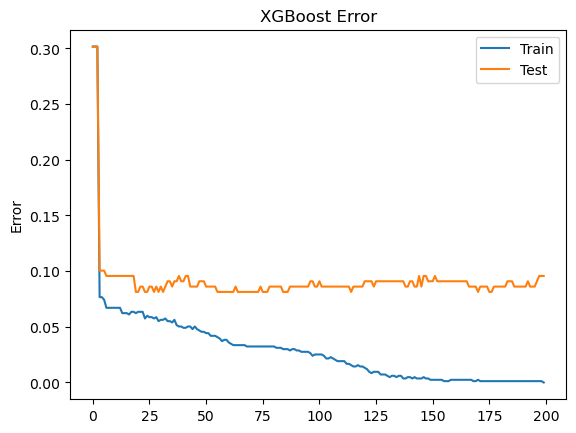

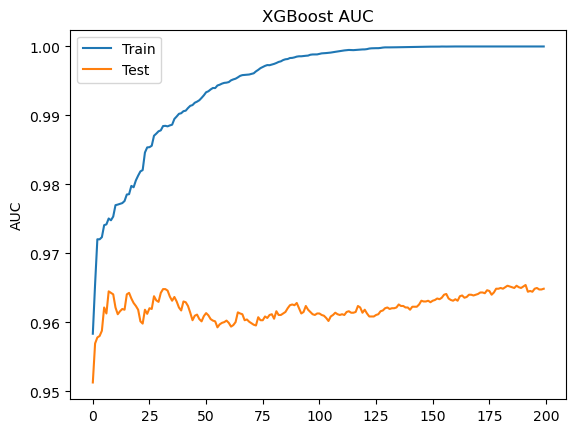

In [28]:
# retrieve performance metrics
results = clf.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Error')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()


### Evaluate the fitted model

In [29]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_auc_score, roc_curve
from itertools import cycle
from scipy import interp

In [30]:
y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_val)
y_pred_test = grid_search.predict(X_test)

y_train_prob = clf.predict_proba(X_train)
y_val_prob = clf.predict_proba(X_val)
y_test_prob = clf.predict_proba(X_test)

In [31]:
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       146
           1       0.84      0.84      0.84        63

    accuracy                           0.90       209
   macro avg       0.89      0.89      0.89       209
weighted avg       0.90      0.90      0.90       209



In [32]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       175
           1       0.88      0.87      0.88        86

    accuracy                           0.92       261
   macro avg       0.91      0.91      0.91       261
weighted avg       0.92      0.92      0.92       261



In [33]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       252

    accuracy                           1.00       835
   macro avg       1.00      1.00      1.00       835
weighted avg       1.00      1.00      1.00       835



In [34]:
# Measure F1 score for training, validation and testing
print('Train Accuracy: %0.3f' % accuracy_score(y_train,y_pred_train))
print('Validation Accuracy: %0.3f' % accuracy_score(y_val,y_pred_val))
print('Test Accuracy: %0.3f' % accuracy_score(y_test,y_pred_test))

Train Accuracy: 1.000
Validation Accuracy: 0.904
Test Accuracy: 0.920


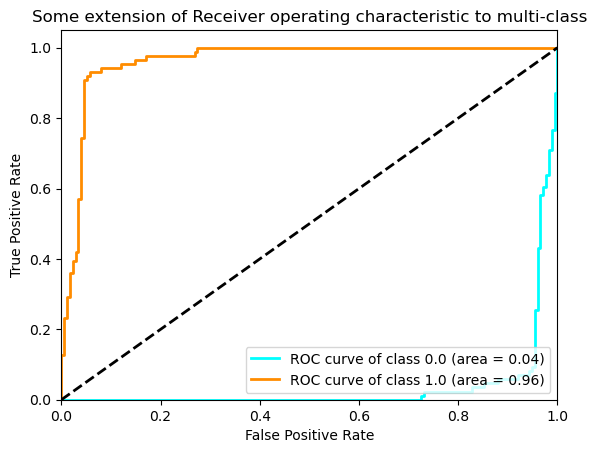

In [35]:
# Plot all ROC curves

from sklearn.preprocessing import label_binarize
#Calculate ROC curve and ROC each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_bin = label_binarize(y_test, classes=[0,1])
n_classes =2

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_test_prob[:,i])
    roc_auc[i] = roc_auc_score(y_test, y_test_prob[:,i])
plt.figure()
lw=2
colors = cycle(['aqua', 'darkorange']) #, 'cornflowerblue' ]) #'deeppink','navy'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [36]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[165  10]
 [ 11  75]]


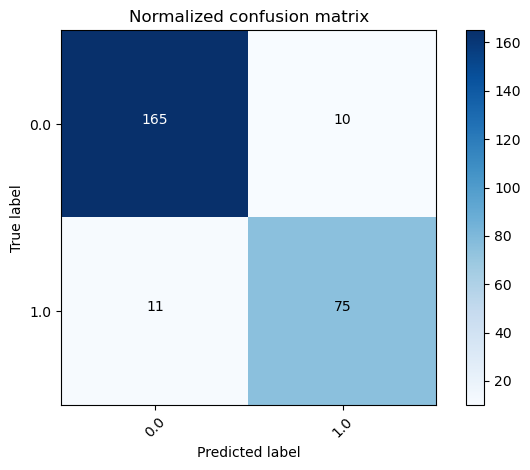

In [37]:
class_names = le.classes_

conf=confusion_matrix(y_test,y_pred_test)
plt.figure()
plot_confusion_matrix(conf, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')
# plt.savefig("cm1.jpg", dpi=900)
plt.show()

In [38]:
import shap

# load JS visualization code to notebook
shap.initjs()
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

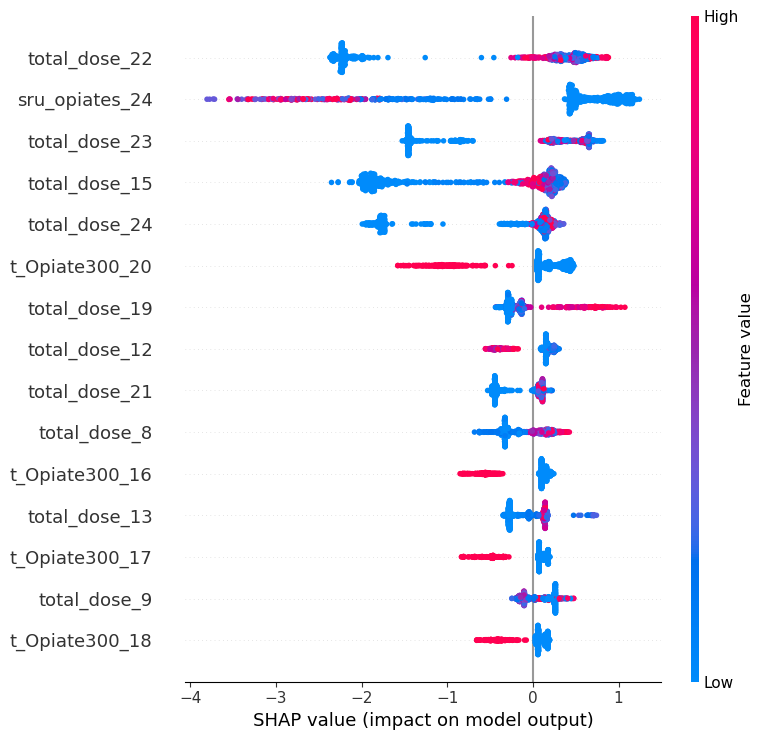

In [40]:
# # shap.force_plot(explainer.expected_value, shap_values, X_smt)
shap.summary_plot(shap_values, X_train, feature_names = X_train.columns,  max_display=15, plot_type="dot")

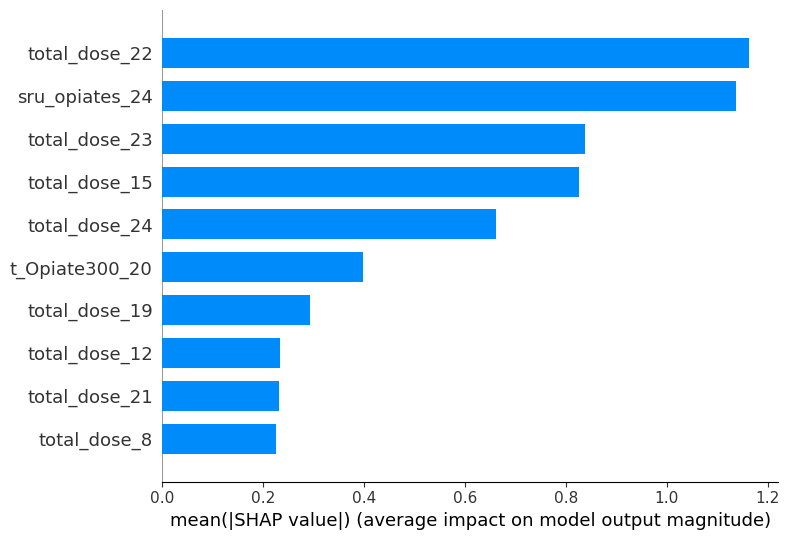

In [41]:
# create shap beeswarm plot
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=10)

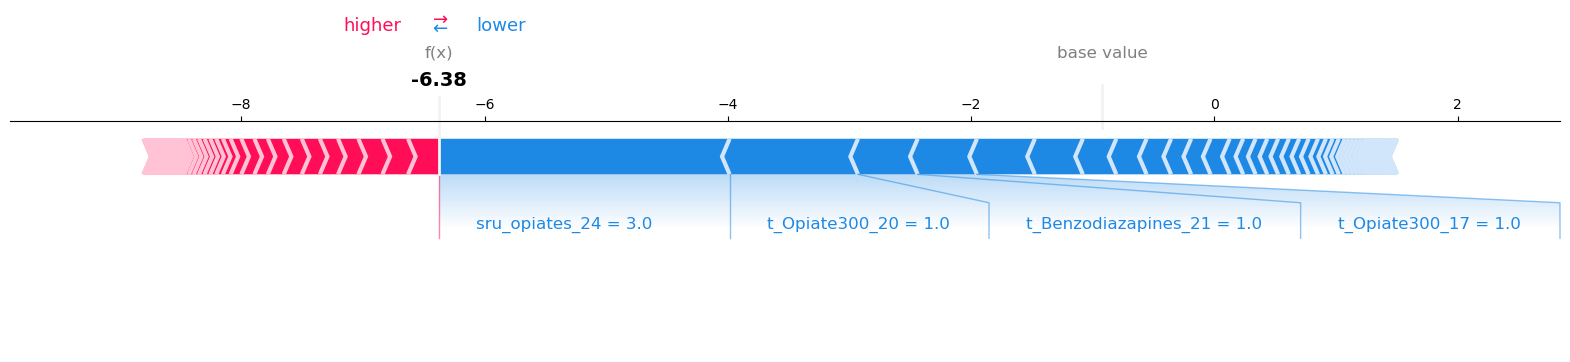

In [42]:
# create shap force plot
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:],matplotlib=True, show=False,)
